In [64]:
# 필요한 라이브러리 불러오기 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter # 샘플링 갯수 결과 보기 위해 필요한 모듈
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 한글 폰트 설정
plt.rcParams.update({"font.family" : "Malgun Gothic"})

In [65]:
# 데이터 불러오기
defect = pd.read_csv("../data/1주_실습데이터.csv")

In [66]:
# 데이터 살펴보기
defect.head()
defect.shape
defect.columns
defect.describe()
defect.isnull().sum().max() # null 값 확인
print('Defect',round(defect['Y'].value_counts()[1]/len(defect) * 100,2), '% of the dataset')

Defect 10.82 % of the dataset


### EDA

C:\Users\USER\AppData\Local\Temp\ipykernel_10992\4275075447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Y', data = defect, palette = colors)


<Axes: xlabel='Y', ylabel='count'>

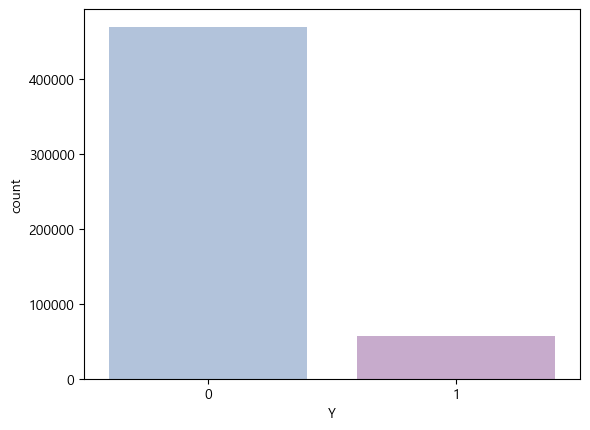

In [67]:
# 타겟변수 시각화 
colors = ["#ABC2E2", "#CBA5D1"]
sns.countplot(x = 'Y', data = defect, palette = colors)

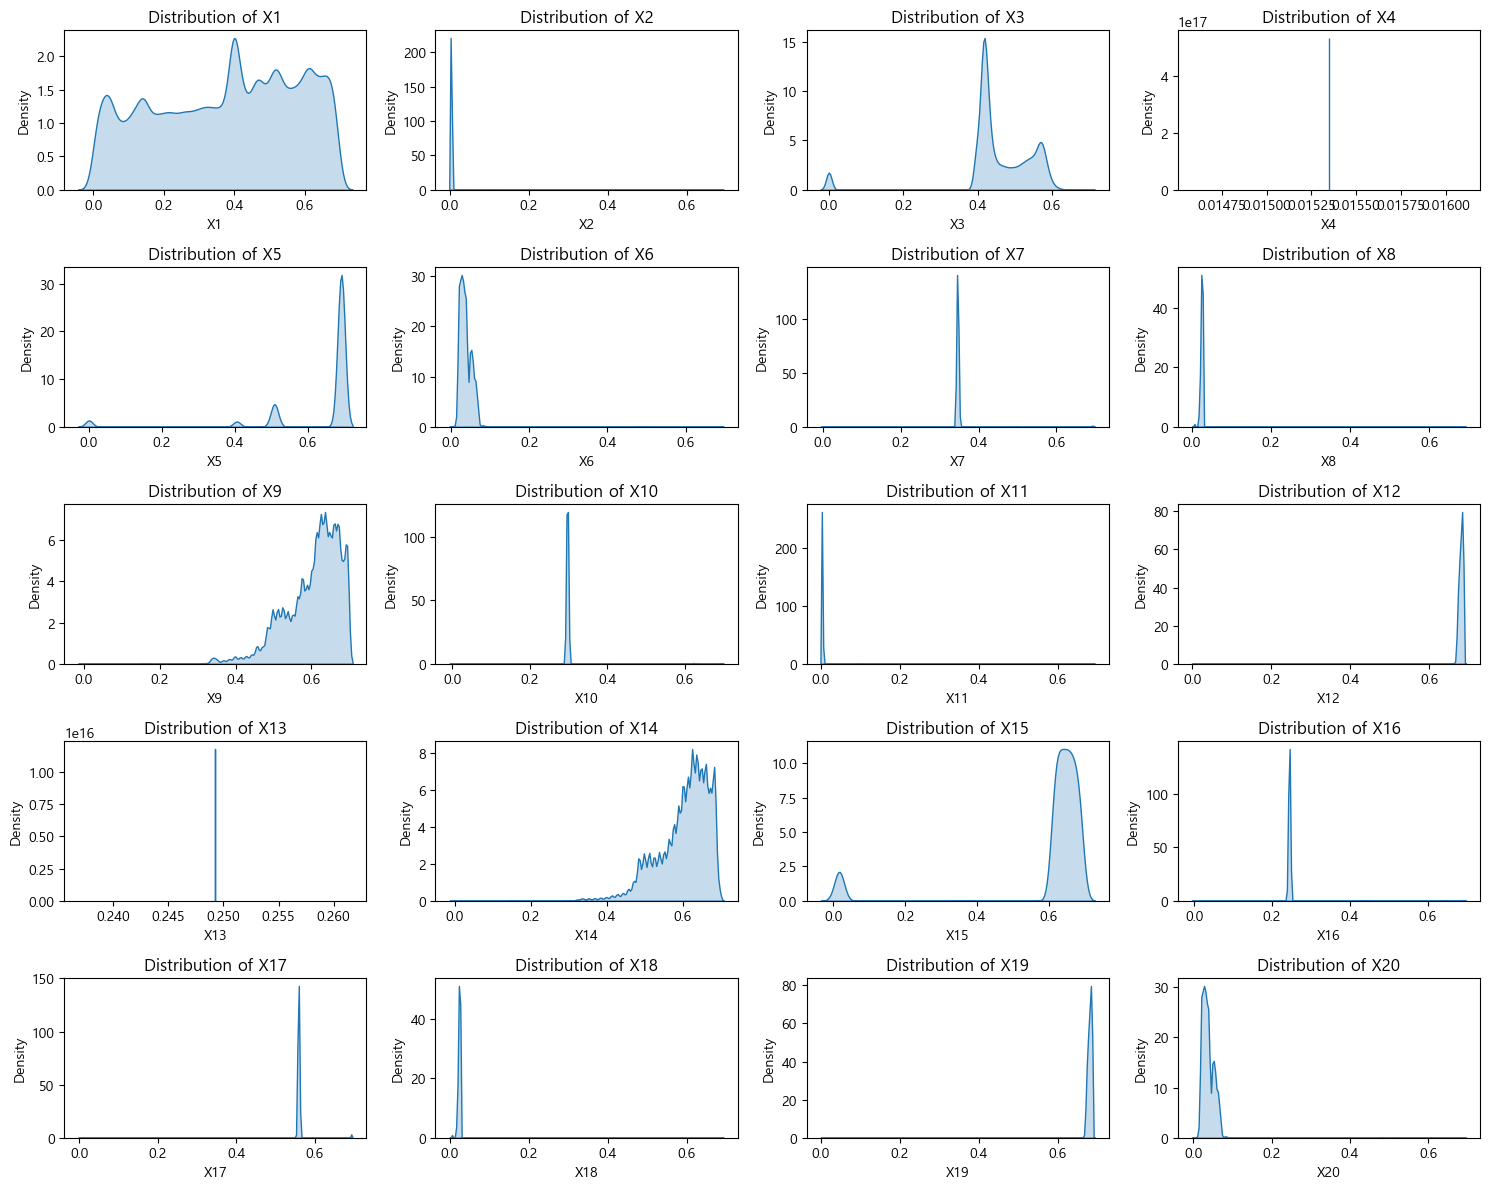

In [68]:
# KDE plot을 통해 각 변수의 분포 시각화
plt.figure(figsize=(15, 12))
for i, column in enumerate(defect.iloc[:, :-1]):  # 마지막 열 Y는 제외하고 X 변수만 사용
    plt.subplot(5, 4, i+1)
    sns.kdeplot(defect[column], fill=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [69]:
### 데이터 나누기 ###
defect_X = defect.drop('Y', axis = 1)
defect_y = defect['Y']

In [70]:
# 독립변수 간 상관관계 알아보기 
defect_X.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
X1,1.000000,0.007232,0.013173,NaN,-0.004800,0.020829,0.042191,0.012175,-0.088833,0.031044,-0.002123,-0.051532,NaN,-0.073749,-0.029015,0.026393,0.037008,0.012175,-0.051532,0.020829
X2,0.007232,1.000000,-0.001012,NaN,-0.032625,0.340155,0.039338,0.145483,-0.198944,0.030899,0.253008,-0.134583,NaN,-0.211325,0.036906,0.049428,0.043113,0.145483,-0.134583,0.340155
X3,0.013173,-0.001012,1.000000,NaN,0.670508,0.050037,-0.065134,0.287924,0.157079,-0.064809,-0.024815,-0.000832,NaN,0.168482,-0.003778,-0.059671,-0.044357,0.287924,-0.000832,0.050037
X4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X5,-0.004800,-0.032625,0.670508,NaN,1.000000,-0.026790,-0.015887,0.378455,0.306740,-0.000004,-0.041576,0.226740,NaN,0.301925,-0.052146,-0.013528,0.006401,0.378455,0.226740,-0.026790
X6,0.020829,0.340155,0.050037,NaN,-0.026790,1.000000,0.057066,0.328973,-0.385757,0.039044,0.250940,-0.290731,NaN,-0.407812,0.063711,0.076880,0.066468,0.328973,-0.290731,1.000000
X7,0.042191,0.039338,-0.065134,NaN,-0.015887,0.057066,1.000000,-0.016945,-0.118575,0.952678,0.041972,-0.005691,NaN,-0.141403,0.038803,0.935487,0.937973,-0.016945,-0.005691,0.057066
X8,0.012175,0.145483,0.287924,NaN,0.378455,0.328973,-0.016945,1.000000,0.274797,0.005087,0.102776,-0.120333,NaN,0.252883,-0.106226,0.000351,0.007589,1.000000,-0.120333,0.328973
X9,-0.088833,-0.198944,0.157079,NaN,0.306740,-0.385757,-0.118575,0.274797,1.000000,-0.070339,-0.142405,0.259801,NaN,0.973964,-0.265122,-0.124379,-0.118145,0.274797,0.259801,-0.385757
X10,0.031044,0.030899,-0.064809,NaN,-0.000004,0.039044,0.952678,0.005087,-0.070339,1.000000,0.037264,0.015780,NaN,-0.092318,0.029965,0.948637,0.980545,0.005087,0.015780,0.039044


c:\DS\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()


<Axes: >

c:\DS\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\DS\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


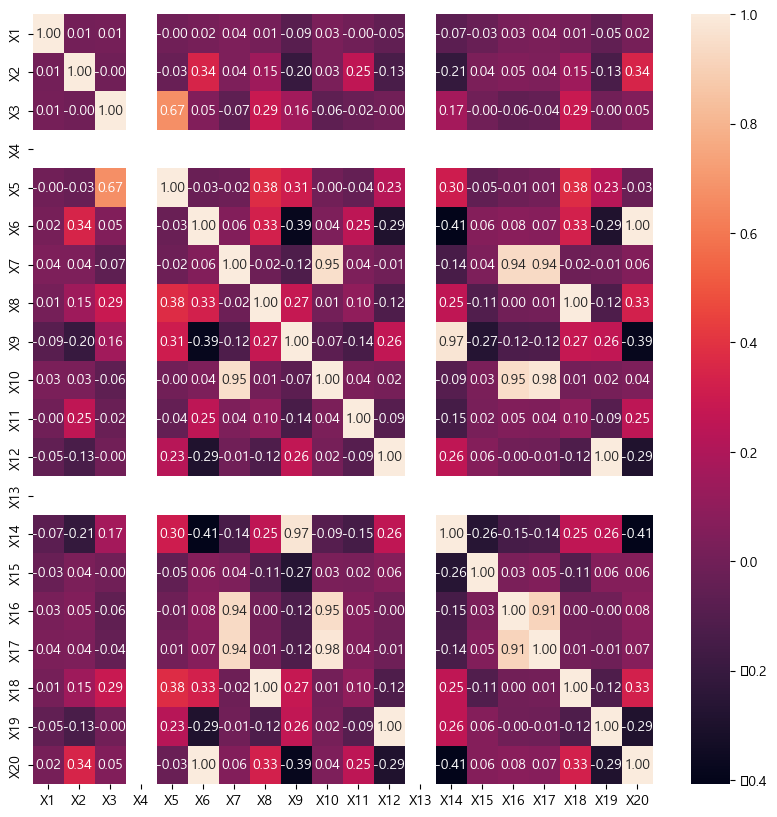

In [71]:
# 독립변수 히트맵
plt.figure(figsize=(10,10))
sns.heatmap(defect_X.corr(),annot=True,fmt=".2f")

In [72]:
# X6와 X20, X8과 X18, X12와 X19 컬럼들이 동일한 지 알아보기
print((defect_X["X6"]-defect_X["X20"]).unique())
print((defect_X["X8"]-defect_X["X18"]).unique())
print((defect_X["X12"]-defect_X["X19"]).unique())

[0.]
[0.]
[0.]


In [73]:
# X4, X13의 값 알아보기
print(defect_X['X4'].unique())
print(defect_X['X13'].unique())

[0.015348]
[0.2492619]


In [74]:
### 컬럼 드롭 ###
defect_X_dropped = defect_X.drop(['X20', 'X18', 'X19', 'X4', 'X13'], axis= 1)

In [75]:
# 다중공선성 확인해보기
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    defect_X_dropped.values, i) for i in range(defect_X_dropped.shape[1])]
vif["features"] = defect_X_dropped.columns
vif

,VIF Factor,features
0,4.608706,X1
1,2.183903,X2
2,38.570471,X3
3,48.205489,X5
4,9.985000,X6
5,1835.454304,X7
6,73.145095,X8
7,1489.955096,X9
8,2305.708857,X10
9,1.845529,X11


In [76]:
### 트레인, 테스트 나누기 ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(defect_X_dropped, defect_y, test_size=0.3, shuffle=True, stratify=defect_y, random_state=4)

### 샘플링으로 데이터 생성, 모델 만들기

In [77]:
### 0. 기본 데이터(샘플링 안 함)
# Original Data
X_train
y_train

## Logistic Regression (로지스틱 회귀 분석)
from sklearn.linear_model import LogisticRegression
model_Original_LogisticRegression = LogisticRegression()
model_Original_LogisticRegression.fit(X_train, y_train)

y_pred_Original_LogisticRegression = model_Original_LogisticRegression.predict(X_test)

## Random Forest (랜덤포레스트)
from sklearn.ensemble import RandomForestClassifier
model_Original_RandomForest = RandomForestClassifier(n_estimators=100, random_state=4)
model_Original_RandomForest.fit(X_train, y_train)

y_pred_Original_RandomForest = model_Original_RandomForest.predict(X_test)

## XGBoost
from xgboost import XGBClassifier
model_Original_XGBoost = XGBClassifier(n_estimators=100, random_state=4)
model_Original_XGBoost.fit(X_train, y_train)

y_pred_Original_XGBoost = model_Original_XGBoost.predict(X_test)

### Light GBM
from lightgbm import LGBMClassifier
model_Original_LightGBM = LGBMClassifier(n_estimators=100, random_state=4, verbose=0) # verbose=0 하면 셀 실행시 결과 보여주는 창에 글자들 없어짐.
model_Original_LightGBM.fit(X_train, y_train)

y_pred_Original_LightGBM = model_Original_LightGBM.predict(X_test)


In [78]:
### 1. 랜덤 언더 샘플링
# Random Under Sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=4)
X_train_RandomUnderSample, y_train_RandomUnderSample = rus.fit_resample(X_train, y_train)

print(f"Before Sampling: {Counter(y_train)}") # 결과 확인
print(f"After Sampling, Random Under Sampling: {Counter(y_train_RandomUnderSample)}")
# {0: 39900, 1: 39900}

## Logistic Regression (로지스틱 회귀 분석)
from sklearn.linear_model import LogisticRegression
model_Under_LogisticRegression = LogisticRegression()
model_Under_LogisticRegression.fit(X_train_RandomUnderSample, y_train_RandomUnderSample)

y_pred_Under_LogisticRegression = model_Under_LogisticRegression.predict(X_test)

## Random Forest (랜덤포레스트)
from sklearn.ensemble import RandomForestClassifier
model_Under_RandomForest = RandomForestClassifier(n_estimators=100, random_state=4)
model_Under_RandomForest.fit(X_train_RandomUnderSample, y_train_RandomUnderSample)

y_pred_Under_RandomForest = model_Under_RandomForest.predict(X_test)

## XGBoost
from xgboost import XGBClassifier
model_Under_XGBoost = XGBClassifier(n_estimators=100, random_state=4)
model_Under_XGBoost.fit(X_train_RandomUnderSample, y_train_RandomUnderSample)

y_pred_Under_XGBoost = model_Under_XGBoost.predict(X_test)

### Light GBM
from lightgbm import LGBMClassifier
model_Under_LightGBM = LGBMClassifier(n_estimators=100, random_state=4, verbose=0)
model_Under_LightGBM.fit(X_train_RandomUnderSample, y_train_RandomUnderSample)

y_pred_Under_LightGBM = model_Under_LightGBM.predict(X_test)

Before Sampling: Counter({0: 329000, 1: 39900})
After Sampling, Random Under Sampling: Counter({0: 39900, 1: 39900})


In [79]:
### 2. 토멕링크
# Tomek Links
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='majority')
X_train_TomekLinks, y_train_TomekLinks = tl.fit_resample(X_train,y_train)

print(f"Before Sampling: {Counter(y_train)}")
print(f"After Sampling, Tomek Links: {Counter(y_train_TomekLinks)}")
# {0: 328971, 1: 39900}


## Logistic Regression (로지스틱 회귀 분석)
from sklearn.linear_model import LogisticRegression
model_Tomek_LogisticRegression = LogisticRegression()
model_Tomek_LogisticRegression.fit(X_train_TomekLinks, y_train_TomekLinks)

y_pred_Tomek_LogisticRegression = model_Tomek_LogisticRegression.predict(X_test)

## Random Forest (랜덤포레스트)
from sklearn.ensemble import RandomForestClassifier
model_Tomek_RandomForest = RandomForestClassifier(n_estimators=100, random_state=4)
model_Tomek_RandomForest.fit(X_train_TomekLinks, y_train_TomekLinks)

y_pred_Tomek_RandomForest = model_Tomek_RandomForest.predict(X_test)

## XGBoost
from xgboost import XGBClassifier
model_Tomek_XGBoost = XGBClassifier(n_estimators=100, random_state=4)
model_Tomek_XGBoost.fit(X_train_TomekLinks, y_train_TomekLinks)

y_pred_Tomek_XGBoost = model_Tomek_XGBoost.predict(X_test)

### Light GBM
from lightgbm import LGBMClassifier
model_Tomek_LightGBM = LGBMClassifier(n_estimators=100, random_state=4, verbose=0)
model_Tomek_LightGBM.fit(X_train_TomekLinks, y_train_TomekLinks)

y_pred_Tomek_LightGBM = model_Tomek_LightGBM.predict(X_test)

Before Sampling: Counter({0: 329000, 1: 39900})
After Sampling, Tomek Links: Counter({0: 328971, 1: 39900})


In [80]:
### 3. 랜덤 오버 샘플링
# Random Over Sampling
from imblearn.over_sampling import RandomOverSampler # 랜덤오버샘플링 해주는거.
ros = RandomOverSampler(random_state=4)
X_train_RandomOverSample, y_train_RandomOverSample = ros.fit_resample(X_train, y_train)

print(f"Before Sampling: {Counter(y_train)}")
print(f"After Sampling, Random Over Sampling: {Counter(y_train_RandomOverSample)}")
# {0: 329000, 1: 329000}


## Logistic Regression (로지스틱 회귀 분석)
from sklearn.linear_model import LogisticRegression
model_Over_LogisticRegression = LogisticRegression()
model_Over_LogisticRegression.fit(X_train_RandomOverSample, y_train_RandomOverSample)

y_pred_Over_LogisticRegression = model_Over_LogisticRegression.predict(X_test)

## Random Forest (랜덤포레스트)
from sklearn.ensemble import RandomForestClassifier
model_Over_RandomForest = RandomForestClassifier(n_estimators=100, random_state=4)
model_Over_RandomForest.fit(X_train_RandomOverSample, y_train_RandomOverSample)

y_pred_Over_RandomForest = model_Over_RandomForest.predict(X_test)

## XGBoost
from xgboost import XGBClassifier
model_Over_XGBoost = XGBClassifier(n_estimators=100, random_state=4)
model_Over_XGBoost.fit(X_train_RandomOverSample, y_train_RandomOverSample)

y_pred_Over_XGBoost = model_Over_XGBoost.predict(X_test)

### Light GBM
from lightgbm import LGBMClassifier
model_Over_LightGBM = LGBMClassifier(n_estimators=100, random_state=4, verbose=0)
model_Over_LightGBM.fit(X_train_RandomOverSample, y_train_RandomOverSample)

y_pred_Over_LightGBM = model_Over_LightGBM.predict(X_test)

Before Sampling: Counter({0: 329000, 1: 39900})
After Sampling, Random Over Sampling: Counter({0: 329000, 1: 329000})


In [81]:
### 4. 스모트
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 4)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

print(f"Before Sampling: {Counter(y_train)}")
print(f"After Sampling, SMOTE: {Counter(y_train_SMOTE)}")
# {0: 329000, 1: 329000}


## Logistic Regression (로지스틱 회귀 분석)
from sklearn.linear_model import LogisticRegression
model_SMOTE_LogisticRegression = LogisticRegression()
model_SMOTE_LogisticRegression.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_SMOTE_LogisticRegression = model_SMOTE_LogisticRegression.predict(X_test)

## Random Forest (랜덤포레스트)
from sklearn.ensemble import RandomForestClassifier
model_SMOTE_RandomForest = RandomForestClassifier(n_estimators=100, random_state=4)
model_SMOTE_RandomForest.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_SMOTE_RandomForest = model_SMOTE_RandomForest.predict(X_test)

## XGBoost
from xgboost import XGBClassifier
model_SMOTE_XGBoost = XGBClassifier(n_estimators=100, random_state=4)
model_SMOTE_XGBoost.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_SMOTE_XGBoost = model_SMOTE_XGBoost.predict(X_test)

### Light GBM
from lightgbm import LGBMClassifier
model_SMOTE_LightGBM = LGBMClassifier(n_estimators=100, random_state=4, verbose=0)
model_SMOTE_LightGBM.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_SMOTE_LightGBM = model_SMOTE_LightGBM.predict(X_test)

Before Sampling: Counter({0: 329000, 1: 39900})
After Sampling, SMOTE: Counter({0: 329000, 1: 329000})


In [82]:
### 5. 스모트 토멕
# SMOTE TOMEK
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=4)
X_train_SmoteTomek, y_train_SmoteTomek = smote_tomek.fit_resample(X_train, y_train)

print(f"Before Sampling: {Counter(y_train)}")
print(f"After Sampling, SMOTE TOMEK: {Counter(y_train_SmoteTomek)}")
# {0: 328953, 1: 328953}


## Logistic Regression (로지스틱 회귀 분석)
from sklearn.linear_model import LogisticRegression
model_SmoteTomek_LogisticRegression = LogisticRegression()
model_SmoteTomek_LogisticRegression.fit(X_train_SmoteTomek, y_train_SmoteTomek)

y_pred_SmoteTomek_LogisticRegression = model_SmoteTomek_LogisticRegression.predict(X_test)

## Random Forest (랜덤포레스트)
from sklearn.ensemble import RandomForestClassifier
model_SmoteTomek_RandomForest = RandomForestClassifier(n_estimators=100, random_state=4)
model_SmoteTomek_RandomForest.fit(X_train_SmoteTomek, y_train_SmoteTomek)

y_pred_SmoteTomek_RandomForest = model_SmoteTomek_RandomForest.predict(X_test)

## XGBoost
from xgboost import XGBClassifier
model_SmoteTomek_XGBoost = XGBClassifier(n_estimators=100, random_state=4)
model_SmoteTomek_XGBoost.fit(X_train_SmoteTomek, y_train_SmoteTomek)

y_pred_SmoteTomek_XGBoost = model_SmoteTomek_XGBoost.predict(X_test)

### Light GBM
from lightgbm import LGBMClassifier
model_SmoteTomek_LightGBM = LGBMClassifier(n_estimators=100, random_state=4, verbose=0)
model_SmoteTomek_LightGBM.fit(X_train_SmoteTomek, y_train_SmoteTomek)

y_pred_SmoteTomek_LightGBM = model_SmoteTomek_LightGBM.predict(X_test)

Before Sampling: Counter({0: 329000, 1: 39900})
After Sampling, SMOTE TOMEK: Counter({0: 328953, 1: 328953})


### 성능 비교

In [83]:
### F1-score
from sklearn.metrics import f1_score

f1_Original_LogisticRegression = f1_score(y_test, y_pred_Original_LogisticRegression)
f1_Original_RandomForest = f1_score(y_test, y_pred_Original_RandomForest)
f1_Original_XGBoost = f1_score(y_test, y_pred_Original_XGBoost)
f1_Original_LightGBM = f1_score(y_test, y_pred_Original_LightGBM)

f1_Under_LogisticRegression = f1_score(y_test, y_pred_Under_LogisticRegression)
f1_Under_RandomForest = f1_score(y_test, y_pred_Under_RandomForest)
f1_Under_XGBoost = f1_score(y_test, y_pred_Under_XGBoost)
f1_Under_LightGBM = f1_score(y_test, y_pred_Under_LightGBM)

f1_Tomek_LogisticRegression = f1_score(y_test, y_pred_Tomek_LogisticRegression)
f1_Tomek_RandomForest = f1_score(y_test, y_pred_Tomek_RandomForest)
f1_Tomek_XGBoost = f1_score(y_test, y_pred_Tomek_XGBoost)
f1_Tomek_LightGBM = f1_score(y_test, y_pred_Tomek_LightGBM)

f1_Over_LogisticRegression = f1_score(y_test, y_pred_Over_LogisticRegression)
f1_Over_RandomForest = f1_score(y_test, y_pred_Over_RandomForest)
f1_Over_XGBoost = f1_score(y_test, y_pred_Over_XGBoost)
f1_Over_LightGBM = f1_score(y_test, y_pred_Over_LightGBM)

f1_SMOTE_LogisticRegression = f1_score(y_test, y_pred_SMOTE_LogisticRegression)
f1_SMOTE_RandomForest = f1_score(y_test, y_pred_SMOTE_RandomForest)
f1_SMOTE_XGBoost = f1_score(y_test, y_pred_SMOTE_XGBoost)
f1_SMOTE_LightGBM = f1_score(y_test, y_pred_SMOTE_LightGBM)

f1_SmoteTomek_LogisticRegression = f1_score(y_test, y_pred_SmoteTomek_LogisticRegression)
f1_SmoteTomek_RandomForest = f1_score(y_test, y_pred_SmoteTomek_RandomForest)
f1_SmoteTomek_XGBoost = f1_score(y_test, y_pred_SmoteTomek_XGBoost)
f1_SmoteTomek_LightGBM = f1_score(y_test, y_pred_SmoteTomek_LightGBM)

f1score_table = pd.DataFrame({
    'sampling' : ['Original', 'Under', 'Tomek', 'Over', 'SMOTE', 'SmoteTomek'],
    'Logistic Regression' : [f1_Original_LogisticRegression, f1_Under_LogisticRegression, f1_Tomek_LogisticRegression, f1_Over_LogisticRegression, f1_SMOTE_LogisticRegression, f1_SmoteTomek_LogisticRegression],
    'Random Forest' : [f1_Original_RandomForest, f1_Under_RandomForest, f1_Tomek_RandomForest, f1_Over_RandomForest, f1_SMOTE_RandomForest, f1_SmoteTomek_RandomForest],
    'XGBoost' : [f1_Original_XGBoost, f1_Under_XGBoost, f1_Tomek_XGBoost, f1_Over_XGBoost, f1_SMOTE_XGBoost, f1_SmoteTomek_XGBoost],
    'Light GBM' : [f1_Original_LightGBM, f1_Under_LightGBM, f1_Tomek_LightGBM, f1_Over_LightGBM, f1_SMOTE_LightGBM, f1_SmoteTomek_LightGBM]
})
f1score_table

,sampling,Logistic Regression,Random Forest,XGBoost,Light GBM
0,Original,0.944333,0.998302,0.998565,0.996753
1,Under,0.889303,0.998244,0.998420,0.998068
2,Tomek,0.944463,0.998360,0.998419,0.995298
3,Over,0.980036,0.998595,0.998448,0.996842
4,SMOTE,0.979328,0.998829,0.998654,0.997660
5,SmoteTomek,0.980516,0.998859,0.998771,0.998273


In [84]:
### G-Mean
from imblearn.metrics import geometric_mean_score

gmean_Original_LogisticRegression = geometric_mean_score(y_test, y_pred_Original_LogisticRegression)
gmean_Original_RandomForest = geometric_mean_score(y_test, y_pred_Original_RandomForest)
gmean_Original_XGBoost = geometric_mean_score(y_test, y_pred_Original_XGBoost)
gmean_Original_LightGBM = geometric_mean_score(y_test, y_pred_Original_LightGBM)

gmean_Under_LogisticRegression = geometric_mean_score(y_test, y_pred_Under_LogisticRegression)
gmean_Under_RandomForest = geometric_mean_score(y_test, y_pred_Under_RandomForest)
gmean_Under_XGBoost = geometric_mean_score(y_test, y_pred_Under_XGBoost)
gmean_Under_LightGBM = geometric_mean_score(y_test, y_pred_Under_LightGBM)

gmean_Tomek_LogisticRegression = geometric_mean_score(y_test, y_pred_Tomek_LogisticRegression)
gmean_Tomek_RandomForest = geometric_mean_score(y_test, y_pred_Tomek_RandomForest)
gmean_Tomek_XGBoost = geometric_mean_score(y_test, y_pred_Tomek_XGBoost)
gmean_Tomek_LightGBM = geometric_mean_score(y_test, y_pred_Tomek_LightGBM)

gmean_Over_LogisticRegression = geometric_mean_score(y_test, y_pred_Over_LogisticRegression)
gmean_Over_RandomForest = geometric_mean_score(y_test, y_pred_Over_RandomForest)
gmean_Over_XGBoost = geometric_mean_score(y_test, y_pred_Over_XGBoost)
gmean_Over_LightGBM = geometric_mean_score(y_test, y_pred_Over_LightGBM)

gmean_SMOTE_LogisticRegression = geometric_mean_score(y_test, y_pred_SMOTE_LogisticRegression)
gmean_SMOTE_RandomForest = geometric_mean_score(y_test, y_pred_SMOTE_RandomForest)
gmean_SMOTE_XGBoost = geometric_mean_score(y_test, y_pred_SMOTE_XGBoost)
gmean_SMOTE_LightGBM = geometric_mean_score(y_test, y_pred_SMOTE_LightGBM)

gmean_SmoteTomek_LogisticRegression = geometric_mean_score(y_test, y_pred_SmoteTomek_LogisticRegression)
gmean_SmoteTomek_RandomForest = geometric_mean_score(y_test, y_pred_SmoteTomek_RandomForest)
gmean_SmoteTomek_XGBoost = geometric_mean_score(y_test, y_pred_SmoteTomek_XGBoost)
gmean_SmoteTomek_LightGBM = geometric_mean_score(y_test, y_pred_SmoteTomek_LightGBM)

gmean_table = pd.DataFrame({
    'sampling' : ['Original', 'Under', 'Tomek', 'Over', 'SMOTE', 'SmoteTomek'],
    'Logistic Regression' : [gmean_Original_LogisticRegression, gmean_Under_LogisticRegression, gmean_Tomek_LogisticRegression, gmean_Over_LogisticRegression, gmean_SMOTE_LogisticRegression, gmean_SmoteTomek_LogisticRegression],
    'Random Forest' : [gmean_Original_RandomForest, gmean_Under_RandomForest, gmean_Tomek_RandomForest, gmean_Over_RandomForest, gmean_SMOTE_RandomForest, gmean_SmoteTomek_RandomForest],
    'XGBoost' : [gmean_Original_XGBoost, gmean_Under_XGBoost, gmean_Tomek_XGBoost, gmean_Over_XGBoost, gmean_SMOTE_XGBoost, gmean_SmoteTomek_XGBoost],
    'Light GBM' : [gmean_Original_LightGBM, gmean_Under_LightGBM, gmean_Tomek_LightGBM, gmean_Over_LightGBM, gmean_SMOTE_LightGBM, gmean_SmoteTomek_LightGBM]
})
gmean_table

,sampling,Logistic Regression,Random Forest,XGBoost,Light GBM
0,Original,0.946625,0.998406,0.998618,0.998038
1,Under,0.981351,0.998553,0.998832,0.998455
2,Tomek,0.946749,0.998464,0.998497,0.997861
3,Over,0.993976,0.998621,0.998604,0.998280
4,SMOTE,0.993862,0.998958,0.999040,0.998559
5,SmoteTomek,0.993985,0.998936,0.999028,0.998582


In [85]:
### FN 개수
# FN = 실제는 Positive인데 예측을 Nagative로 분류 한 것 = 정답은 1인데 0으로 분류 한 것 = 불량인데 양품이라고 분류한 것
from sklearn.metrics import confusion_matrix
'''
컨퓨젼 메트릭스가 나타내는 값
[[TN, FP],
 [FN, TP]]
'''

fn_Original_LogisticRegression = confusion_matrix(y_test, y_pred_Original_LogisticRegression)[1, 0]
fn_Original_RandomForest = confusion_matrix(y_test, y_pred_Original_RandomForest)[1, 0]
fn_Original_XGBoost = confusion_matrix(y_test, y_pred_Original_XGBoost)[1, 0]
fn_Original_LightGBM = confusion_matrix(y_test, y_pred_Original_LightGBM)[1, 0]

fn_Under_LogisticRegression = confusion_matrix(y_test, y_pred_Under_LogisticRegression)[1, 0]
fn_Under_RandomForest = confusion_matrix(y_test, y_pred_Under_RandomForest)[1, 0]
fn_Under_XGBoost = confusion_matrix(y_test, y_pred_Under_XGBoost)[1, 0]
fn_Under_LightGBM = confusion_matrix(y_test, y_pred_Under_LightGBM)[1, 0]

fn_Tomek_LogisticRegression = confusion_matrix(y_test, y_pred_Tomek_LogisticRegression)[1, 0]
fn_Tomek_RandomForest = confusion_matrix(y_test, y_pred_Tomek_RandomForest)[1, 0]
fn_Tomek_XGBoost = confusion_matrix(y_test, y_pred_Tomek_XGBoost)[1, 0]
fn_Tomek_LightGBM = confusion_matrix(y_test, y_pred_Tomek_LightGBM)[1, 0]

fn_Over_LogisticRegression = confusion_matrix(y_test, y_pred_Over_LogisticRegression)[1, 0]
fn_Over_RandomForest = confusion_matrix(y_test, y_pred_Over_RandomForest)[1, 0]
fn_Over_XGBoost = confusion_matrix(y_test, y_pred_Over_XGBoost)[1, 0]
fn_Over_LightGBM = confusion_matrix(y_test, y_pred_Over_LightGBM)[1, 0]

fn_SMOTE_LogisticRegression = confusion_matrix(y_test, y_pred_SMOTE_LogisticRegression)[1, 0]
fn_SMOTE_RandomForest = confusion_matrix(y_test, y_pred_SMOTE_RandomForest)[1, 0]
fn_SMOTE_XGBoost = confusion_matrix(y_test, y_pred_SMOTE_XGBoost)[1, 0]
fn_SMOTE_LightGBM = confusion_matrix(y_test, y_pred_SMOTE_LightGBM)[1, 0]

fn_SmoteTomek_LogisticRegression = confusion_matrix(y_test, y_pred_SmoteTomek_LogisticRegression)[1, 0]
fn_SmoteTomek_RandomForest = confusion_matrix(y_test, y_pred_SmoteTomek_RandomForest)[1, 0]
fn_SmoteTomek_XGBoost = confusion_matrix(y_test, y_pred_SmoteTomek_XGBoost)[1, 0]
fn_SmoteTomek_LightGBM = confusion_matrix(y_test, y_pred_SmoteTomek_LightGBM)[1, 0]

fn_table = pd.DataFrame({
    'sampling' : ['Original', 'Under', 'Tomek', 'Over', 'SMOTE', 'SmoteTomek'],
    'Logistic Regression' : [fn_Original_LogisticRegression, fn_Under_LogisticRegression, fn_Tomek_LogisticRegression, fn_Over_LogisticRegression, fn_SMOTE_LogisticRegression, fn_SmoteTomek_LogisticRegression],
    'Random Forest' : [fn_Original_RandomForest, fn_Under_RandomForest, fn_Tomek_RandomForest, fn_Over_RandomForest, fn_SMOTE_RandomForest, fn_SmoteTomek_RandomForest],
    'XGBoost' : [fn_Original_XGBoost, fn_Under_XGBoost, fn_Tomek_XGBoost, fn_Over_XGBoost, fn_SMOTE_XGBoost, fn_SmoteTomek_XGBoost],
    'Light GBM' : [fn_Original_LightGBM, fn_Under_LightGBM, fn_Tomek_LightGBM, fn_Over_LightGBM, fn_SMOTE_LightGBM, fn_SmoteTomek_LightGBM]
})
fn_table

,sampling,Logistic Regression,Random Forest,XGBoost,Light GBM
0,Original,1773,54,47,61
1,Under,141,48,38,51
2,Tomek,1769,52,51,61
3,Over,139,47,47,52
4,SMOTE,140,35,31,45
5,SmoteTomek,141,36,32,47


In [86]:
### AUC score (Area Under the Curve) 
# ROC 커브를 그린 후 그 면적을 구한 값을 AUC라고 한다.
# 0.8보다 작으면 별로이다
# 값이 클수록 성능이 좋다

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_Original_LogisticRegression)

auc_Original_LogisticRegression = roc_auc_score(y_test, y_pred_Original_LogisticRegression)
auc_Original_RandomForest = roc_auc_score(y_test, y_pred_Original_RandomForest)
auc_Original_XGBoost = roc_auc_score(y_test, y_pred_Original_XGBoost)
auc_Original_LightGBM = roc_auc_score(y_test, y_pred_Original_LightGBM)

auc_Under_LogisticRegression = roc_auc_score(y_test, y_pred_Under_LogisticRegression)
auc_Under_RandomForest = roc_auc_score(y_test, y_pred_Under_RandomForest)
auc_Under_XGBoost = roc_auc_score(y_test, y_pred_Under_XGBoost)
auc_Under_LightGBM = roc_auc_score(y_test, y_pred_Under_LightGBM)

auc_Tomek_LogisticRegression = roc_auc_score(y_test, y_pred_Tomek_LogisticRegression)
auc_Tomek_RandomForest = roc_auc_score(y_test, y_pred_Tomek_RandomForest)
auc_Tomek_XGBoost = roc_auc_score(y_test, y_pred_Tomek_XGBoost)
auc_Tomek_LightGBM = roc_auc_score(y_test, y_pred_Tomek_LightGBM)

auc_Over_LogisticRegression = roc_auc_score(y_test, y_pred_Over_LogisticRegression)
auc_Over_RandomForest = roc_auc_score(y_test, y_pred_Over_RandomForest)
auc_Over_XGBoost = roc_auc_score(y_test, y_pred_Over_XGBoost)
auc_Over_LightGBM = roc_auc_score(y_test, y_pred_Over_LightGBM)

auc_SMOTE_LogisticRegression = roc_auc_score(y_test, y_pred_SMOTE_LogisticRegression)
auc_SMOTE_RandomForest = roc_auc_score(y_test, y_pred_SMOTE_RandomForest)
auc_SMOTE_XGBoost = roc_auc_score(y_test, y_pred_SMOTE_XGBoost)
auc_SMOTE_LightGBM = roc_auc_score(y_test, y_pred_SMOTE_LightGBM)

auc_SmoteTomek_LogisticRegression = roc_auc_score(y_test, y_pred_SmoteTomek_LogisticRegression)
auc_SmoteTomek_RandomForest = roc_auc_score(y_test, y_pred_SmoteTomek_RandomForest)
auc_SmoteTomek_XGBoost = roc_auc_score(y_test, y_pred_SmoteTomek_XGBoost)
auc_SmoteTomek_LightGBM = roc_auc_score(y_test, y_pred_SmoteTomek_LightGBM)

aucScore_table = pd.DataFrame({
    'sampling' : ['Original', 'Under', 'Tomek', 'Over', 'SMOTE', 'SmoteTomek'],
    'Logistic Regression' : [auc_Original_LogisticRegression, auc_Under_LogisticRegression, auc_Tomek_LogisticRegression, auc_Over_LogisticRegression, auc_SMOTE_LogisticRegression, auc_SmoteTomek_LogisticRegression],
    'Random Forest' : [auc_Original_RandomForest, auc_Under_RandomForest, auc_Tomek_RandomForest, auc_Over_RandomForest, auc_SMOTE_RandomForest, auc_SmoteTomek_RandomForest],
    'XGBoost' : [auc_Original_XGBoost, auc_Under_XGBoost, auc_Tomek_XGBoost, auc_Over_XGBoost, auc_SMOTE_XGBoost, auc_SmoteTomek_XGBoost],
    'Light GBM' : [auc_Original_LightGBM, auc_Under_LightGBM, auc_Tomek_LightGBM, auc_Over_LightGBM, auc_SMOTE_LightGBM, auc_SmoteTomek_LightGBM]
})
aucScore_table

,sampling,Logistic Regression,Random Forest,XGBoost,Light GBM
0,Original,0.948037,0.998407,0.998619,0.998039
1,Under,0.981406,0.998554,0.998832,0.998456
2,Tomek,0.948154,0.998465,0.998498,0.997862
3,Over,0.993978,0.998622,0.998604,0.998281
4,SMOTE,0.993864,0.998959,0.999040,0.998560
5,SmoteTomek,0.993987,0.998937,0.999029,0.998583


In [87]:
### 샘플링 성능지표 만들기
sampling_score_Original = pd.DataFrame({
    'model' : ['Logistic Regression', 'Random Forest', 'XGBoost', 'Light GBM'],
    'F1-score' : [f1_Original_LogisticRegression, f1_Original_RandomForest, f1_Original_XGBoost, f1_Original_LightGBM],
    'G-means' : [gmean_Original_LogisticRegression, gmean_Original_RandomForest, gmean_Original_XGBoost, gmean_Original_LightGBM],
    'FN count' : [fn_Original_LogisticRegression, fn_Original_RandomForest, fn_Original_XGBoost, fn_Original_LightGBM],
    'AUC score' : [auc_Original_LogisticRegression, auc_Original_RandomForest, auc_Original_XGBoost, auc_Original_LightGBM]
})

sampling_score_RandomUnder = pd.DataFrame({
    'model' : ['Logistic Regression', 'Random Forest', 'XGBoost', 'Light GBM'],
    'F1-score' : [f1_Under_LogisticRegression, f1_Under_RandomForest, f1_Under_XGBoost, f1_Under_LightGBM],
    'G-means' : [gmean_Under_LogisticRegression, gmean_Under_RandomForest, gmean_Under_XGBoost, gmean_Under_LightGBM],
    'FN count' : [fn_Under_LogisticRegression, fn_Under_RandomForest, fn_Under_XGBoost, fn_Under_LightGBM],
    'AUC score' : [auc_Under_LogisticRegression, auc_Under_RandomForest, auc_Under_XGBoost, auc_Under_LightGBM]
})

sampling_score_TomekLinks = pd.DataFrame({
    'model' : ['Logistic Regression', 'Random Forest', 'XGBoost', 'Light GBM'],
    'F1-score' : [f1_Tomek_LogisticRegression, f1_Tomek_RandomForest, f1_Tomek_XGBoost, f1_Tomek_LightGBM],
    'G-means' : [gmean_Tomek_LogisticRegression, gmean_Tomek_RandomForest, gmean_Tomek_XGBoost, gmean_Tomek_LightGBM],
    'FN count' : [fn_Tomek_LogisticRegression, fn_Tomek_RandomForest, fn_Tomek_XGBoost, fn_Tomek_LightGBM],
    'AUC score' : [auc_Tomek_LogisticRegression, auc_Tomek_RandomForest, auc_Tomek_XGBoost, auc_Tomek_LightGBM]
})

sampling_score_RandomOver = pd.DataFrame({
    'model' : ['Logistic Regression', 'Random Forest', 'XGBoost', 'Light GBM'],
    'F1-score' : [f1_Over_LogisticRegression, f1_Over_RandomForest, f1_Over_XGBoost, f1_Over_LightGBM],
    'G-means' : [gmean_Over_LogisticRegression, gmean_Over_RandomForest, gmean_Over_XGBoost, gmean_Over_LightGBM],
    'FN count' : [fn_Over_LogisticRegression, fn_Over_RandomForest, fn_Over_XGBoost, fn_Over_LightGBM],
    'AUC score' : [auc_Over_LogisticRegression, auc_Over_RandomForest, auc_Over_XGBoost, auc_Over_LightGBM]
})

sampling_score_SMOTE = pd.DataFrame({
    'model' : ['Logistic Regression', 'Random Forest', 'XGBoost', 'Light GBM'],
    'F1-score' : [f1_SMOTE_LogisticRegression, f1_SMOTE_RandomForest, f1_SMOTE_XGBoost, f1_SMOTE_LightGBM],
    'G-means' : [gmean_SMOTE_LogisticRegression, gmean_SMOTE_RandomForest, gmean_SMOTE_XGBoost, gmean_SMOTE_LightGBM],
    'FN count' : [fn_SMOTE_LogisticRegression, fn_SMOTE_RandomForest, fn_SMOTE_XGBoost, fn_SMOTE_LightGBM],
    'AUC score' : [auc_SMOTE_LogisticRegression, auc_SMOTE_RandomForest, auc_SMOTE_XGBoost, auc_SMOTE_LightGBM]
})

sampling_score_SmoteTomek = pd.DataFrame({
    'model' : ['Logistic Regression', 'Random Forest', 'XGBoost', 'Light GBM'],
    'F1-score' : [f1_SmoteTomek_LogisticRegression, f1_SmoteTomek_RandomForest, f1_SmoteTomek_XGBoost, f1_SmoteTomek_LightGBM],
    'G-means' : [gmean_SmoteTomek_LogisticRegression, gmean_SmoteTomek_RandomForest, gmean_SmoteTomek_XGBoost, gmean_SmoteTomek_LightGBM],
    'FN count' : [fn_SmoteTomek_LogisticRegression, fn_SmoteTomek_RandomForest, fn_SmoteTomek_XGBoost, fn_SmoteTomek_LightGBM],
    'AUC score' : [auc_SmoteTomek_LogisticRegression, auc_SmoteTomek_RandomForest, auc_SmoteTomek_XGBoost, auc_SmoteTomek_LightGBM]
})

In [88]:
sampling_score_Original

,model,F1-score,G-means,FN count,AUC score
0,Logistic Regression,0.944333,0.946625,1773,0.948037
1,Random Forest,0.998302,0.998406,54,0.998407
2,XGBoost,0.998565,0.998618,47,0.998619
3,Light GBM,0.996753,0.998038,61,0.998039


In [89]:
sampling_score_RandomUnder

,model,F1-score,G-means,FN count,AUC score
0,Logistic Regression,0.889303,0.981351,141,0.981406
1,Random Forest,0.998244,0.998553,48,0.998554
2,XGBoost,0.998420,0.998832,38,0.998832
3,Light GBM,0.998068,0.998455,51,0.998456


In [90]:
sampling_score_TomekLinks

,model,F1-score,G-means,FN count,AUC score
0,Logistic Regression,0.944463,0.946749,1769,0.948154
1,Random Forest,0.998360,0.998464,52,0.998465
2,XGBoost,0.998419,0.998497,51,0.998498
3,Light GBM,0.995298,0.997861,61,0.997862


In [91]:
sampling_score_RandomOver

,model,F1-score,G-means,FN count,AUC score
0,Logistic Regression,0.980036,0.993976,139,0.993978
1,Random Forest,0.998595,0.998621,47,0.998622
2,XGBoost,0.998448,0.998604,47,0.998604
3,Light GBM,0.996842,0.998280,52,0.998281


In [92]:
sampling_score_SMOTE

,model,F1-score,G-means,FN count,AUC score
0,Logistic Regression,0.979328,0.993862,140,0.993864
1,Random Forest,0.998829,0.998958,35,0.998959
2,XGBoost,0.998654,0.999040,31,0.999040
3,Light GBM,0.997660,0.998559,45,0.998560


In [93]:
sampling_score_SmoteTomek

,model,F1-score,G-means,FN count,AUC score
0,Logistic Regression,0.980516,0.993985,141,0.993987
1,Random Forest,0.998859,0.998936,36,0.998937
2,XGBoost,0.998771,0.999028,32,0.999029
3,Light GBM,0.998273,0.998582,47,0.998583


### 성능비교로 알 수 있는 시사점
F1스코어가 가장 높은 조합은? SmoteTomek * XGBoost\
G-means가 가장 높은 조합은? SMOTE * XGBoost\
FN 갯수가 가장 낮은 조합은? SMOTE * XGBoost\
AUC 값이 가장 높은 조합은? SMOTE * XGBoost\
가장 괜찮은 셈플링, 모델 조합은 SMOTE * XGBoost이다.\
이 조합일 때 중요한 변수는 뭘까?

### 중요한 변수 알아보자!

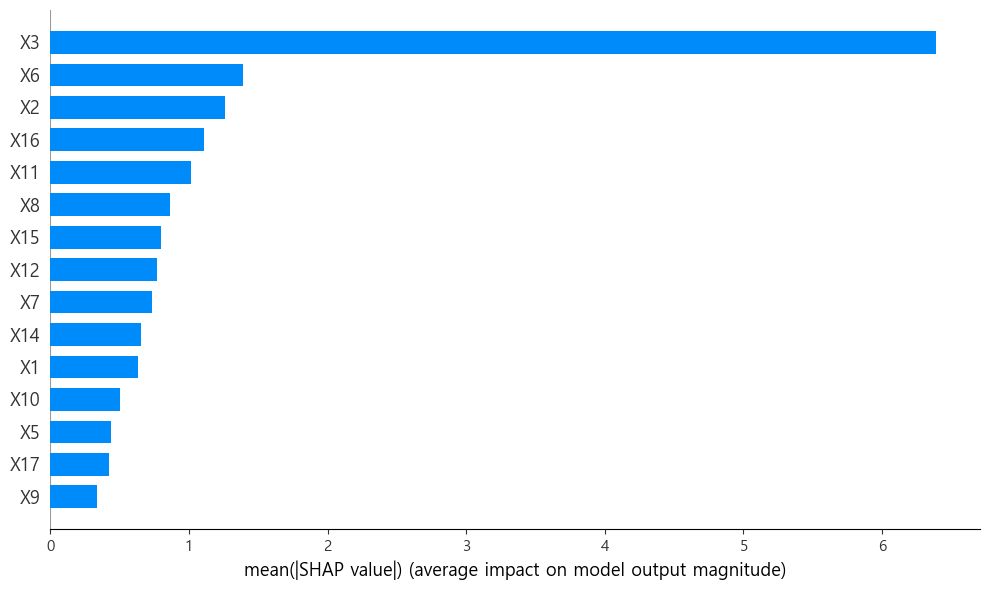

In [94]:
from sklearn.inspection import PartialDependenceDisplay
import shap

# 1. SHAP Values
explainer = shap.Explainer(model_SMOTE_XGBoost) # XGBoost 모델에 대해 Explainer 사용
shap_values = explainer(X_train_SMOTE) # SHAP 값 계산

shap.summary_plot(shap_values, X_train_SMOTE, plot_type="bar", plot_size=(10, 6))

### 분류하는데 X3 변수가 가장 큰 역할을 하는구나!
X3만 봐도 불량, 양품인지 알 수 있겠네.
### 이 녀석을 조금 더 알아보자!

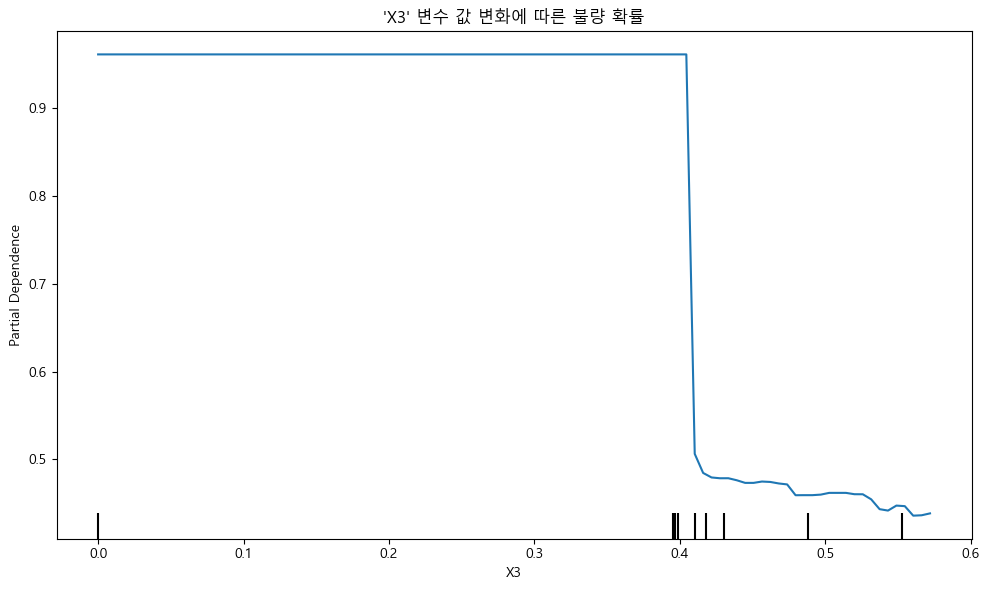

In [95]:
# X3 변수의 PDP 그리기
feature_to_plot = 2  # X3 변수의 인덱스 (변수 번호에 맞게 조정)
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(model_SMOTE_XGBoost, X_train_SMOTE, features=[feature_to_plot], ax=ax)
plt.title("'X3' 변수 값 변화에 따른 불량 확률")
plt.xlabel("X3")
plt.ylabel("Partial Dependence")
plt.tight_layout()
plt.show()

PDP를 살펴봤다.\
X3이 0.4 기준으로 작은 구간에서 불량률이 0.9 이상으로 높다.\
높은 구간에서 불량률이 줄어든 것이 확인된다.\
\
raw 데이터에서 0.4를 기준으로 종속변수들의 빈도가 어떤 지 살펴보자.

In [96]:
print(defect[defect['X3'] < 0.4053]['Y'].value_counts())
print(defect[defect['X3'] >= 0.4053]['Y'].value_counts())

# X3이 0.4053 보다 작을 때는 불량품 밖에 없음을 확인할 수 있었음.

Y
1    53352
Name: count, dtype: int64
Y
0    470000
1      3648
Name: count, dtype: int64
